In [108]:
from sklearn.datasets import load_digits
from typing import Any
from matplotlib import pyplot as plt
import numpy as np
from sklearn import model_selection

In [39]:
digits: Any = load_digits()

print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


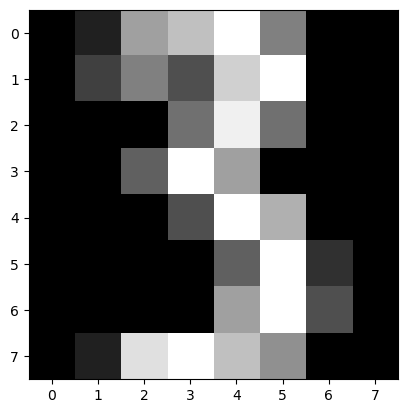

In [40]:
img = np.zeros((8,8))
for i in range(images.shape[0]):
    if target[i] == 3:
        img = images[i]

assert 2 == len(img.shape)

plt.figure()
plt.gray()
plt.imshow(img)
plt.show()

In [41]:
# get all the threes and nines
indices = np.logical_or(target==3, target==9)
x = data[indices]
y = target[indices]

In [42]:
# split the data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, random_state=0)

In [64]:
# handcraft two features
def features_2d(x: np.ndarray | Any) -> np.ndarray:
    # takes: nx8x8 array
    # returns: nx2 array
    reshaped = x.reshape(-1,8,8)
    left_sum = reshaped[:,:4,:].sum(axis=(1,2)).reshape(-1,1)
    bottom_sum = reshaped[:,:,4:].sum(axis=(1,2)).reshape(-1,1)
    return np.concatenate((left_sum, bottom_sum), axis=1)
features = features_2d(x)

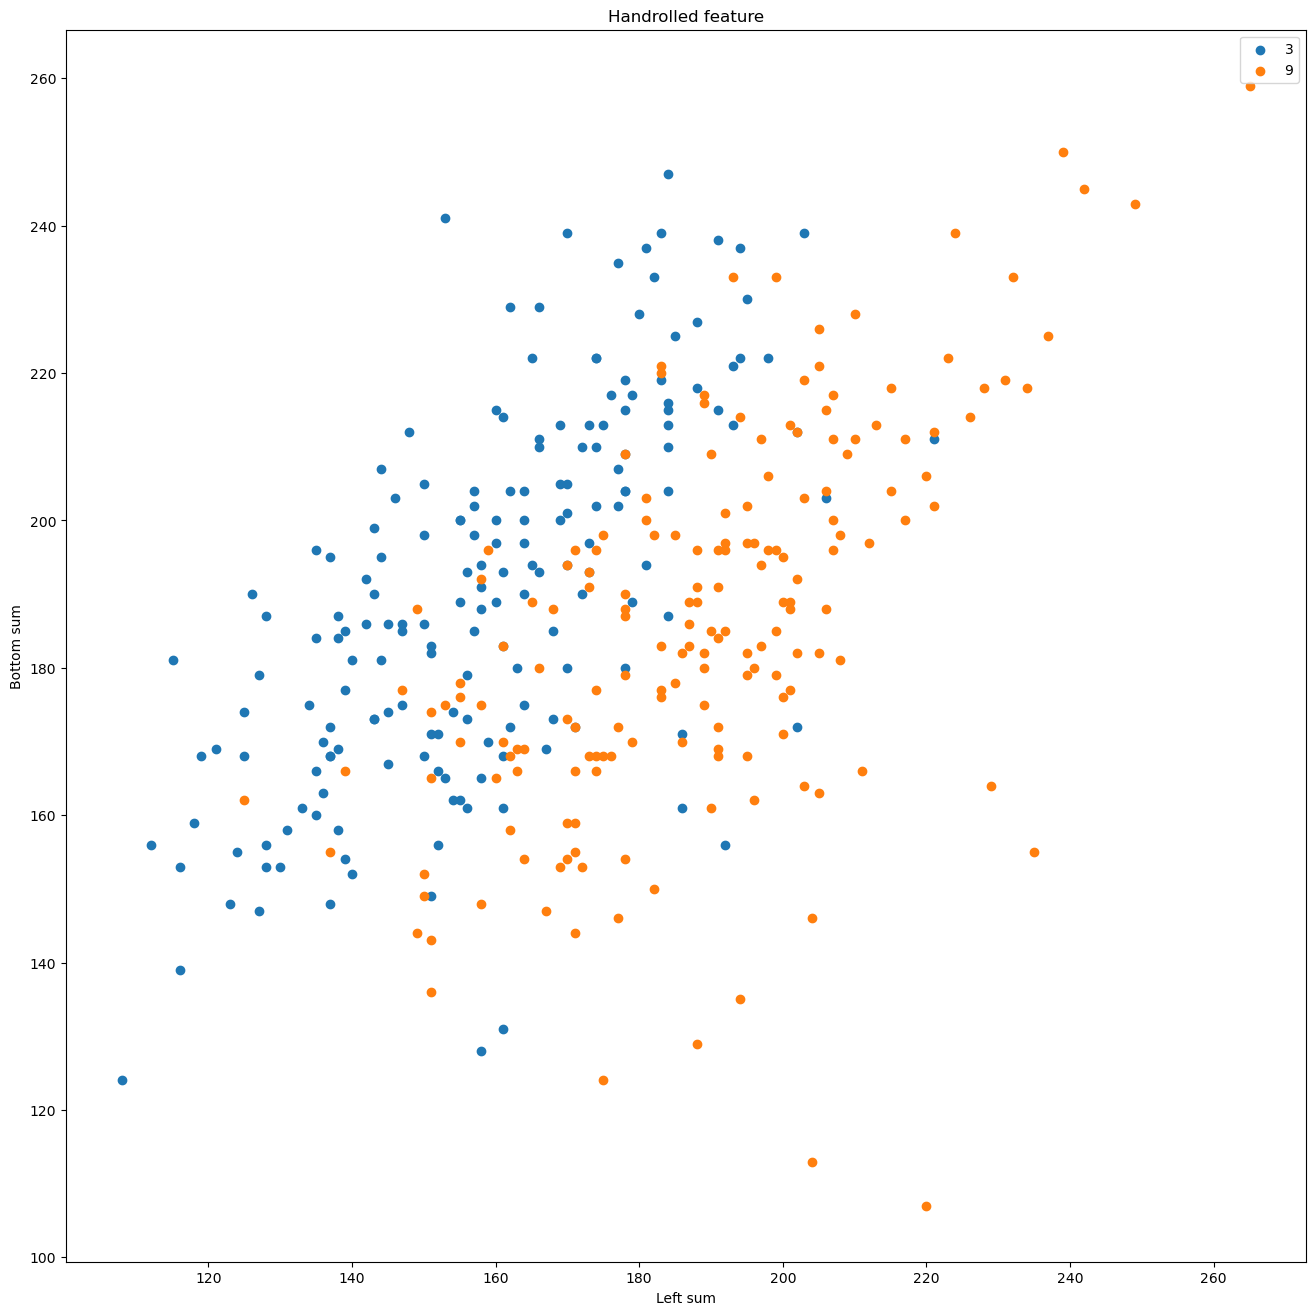

In [65]:
# plot the features
plt.figure(figsize=(16,16))
plt.scatter(features[y==3,0], features[y==3,1], marker='o', label='3')
plt.scatter(features[y==9,0], features[y==9,1], marker='x', label='9')

plt.title('Handrolled feature')
plt.xlabel('Left sum')
plt.ylabel('Bottom sum')
plt.legend()

plt.show()

In [86]:
def nearest_mean(train_features, train_labels, test_features):
    # 3 -> -1
    # 9 -> 1
    neg_feat_means = train_features[train_labels==-1].mean(axis=0)
    pos_feat_means = train_features[train_labels==1].mean(axis=0)
   
    if test_features is None:
        return None, neg_feat_means, pos_feat_means

    neg_dist = np.linalg.norm(test_features - neg_feat_means, axis=1)
    pos_dist = np.linalg.norm(test_features - pos_feat_means, axis=1)
    return (pos_dist < neg_dist) * 2 - 1, neg_feat_means, pos_feat_means


train_labels = ((y_train==9)*2)-1
train_features = features_2d(x_train)
test_features = features_2d(x_test)

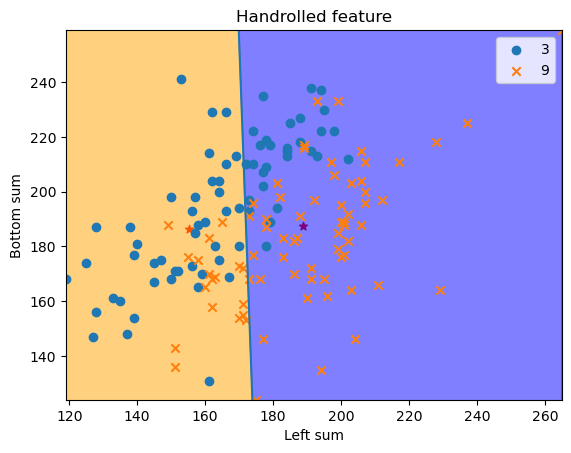

In [111]:
_, neg, pos = nearest_mean(train_features, train_labels, test_features)

x1, y1 = neg
x2, y2 = pos
mid_x = (x1 + x2) / 2
mid_y = (y1 + y2) / 2
x_min = np.min(test_features[:, 0])
x_max = np.max(test_features[:, 0])
y_max = np.max(test_features[:, 1])
y_min = np.min(test_features[:, 1])

# Perpendicular bisector
if x2 != x1:  # Prevent division by zero
    perp_slope = -(x2 - x1) / (y2 - y1)
else:
    perp_slope = float('inf')  # Vertical line

# Define x range for the plot
x_values = np.linspace(x_min, x_max, 40)
if perp_slope != float('inf'):
    y_values = perp_slope * (x_values - mid_x) + mid_y
else:
    x_values = np.full_like(x_values, mid_x)
    y_values = np.linspace(y_min, y_max, 40)

# Plot the decision region
plt.figure()
plt.plot(x_values, y_values)
plt.scatter([x1, x2], [y1, y2], color='red', marker = '*')  # Points
plt.fill_between(x_values, y_values, y_values.max(), color='blue', alpha=0.5)
plt.fill_between(x_values, y_values, y_values.min(), color='orange', alpha=0.5)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot the points
plt.scatter(test_features[y_test==3,0], test_features[y_test==3,1], marker='o', label='3')
plt.scatter(test_features[y_test==9,0], test_features[y_test==9,1], marker='x', label='9')

plt.title('Handrolled feature')
plt.xlabel('Left sum')
plt.ylabel('Bottom sum')

plt.legend()
plt.show()

In [ ]:
# lda
def fit_lda(train_feat, train_labels):
    feat_pos = trains_feat[trains_labels==1]
    feat_neg = trains_feat[trains_labels==-1]
    mu_pos = feat_pos.mean(axis=0)
    mu_neg = feat_neg.mean(axis=0)
    sigma_pos = (feat_pos - mu_pos).T.dot(feat_pos - mu_pos)
    sigma_neg = (feat_neg - mu_neg).T.dot(feat_neg - mu_neg) 